<a href="https://colab.research.google.com/github/urmzd/rabbit-classifier/blob/main/src/rc_e1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install loguru

# Data Exploration

In [60]:
!mkdir -p /tmp
!curl https://raw.githubusercontent.com/urmzd/rabbit-classifier/main/resources/data.csv --output /tmp/data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9455  100  9455    0     0  62203      0 --:--:-- --:--:-- --:--:-- 62615


In [78]:
import pandas as pd
import requests
import os
import re
import pathlib
from loguru import logger

DATA_PATH="/tmp/data.csv"
IMAGE_PATH="/tmp/images"

def get_data():
  df = pd.read_csv(DATA_PATH, usecols=range(2))
  return df

def download_image(link: str) -> pathlib.Path:
  # view  : https://regex101.com/r/3bhDMM/1
  # delete: https://regex101.com/delete/N5sItwbrPF73ZllTnRDltxZ1
  file_name_regex = re.compile(r".*\/(.*(\.(jpeg|jpg|png))?)\??.*", flags=re.IGNORECASE)
  regex_matches = file_name_regex.match(link)

  if not regex_matches:
    raise Exception(f"Failed to match file_name for link {link}")

  if len(regex_matches.groups()) < 3:
    file_name = regex_matches.group(1) + ".png"
  else:
    file_name = regex_matches.group(1)

  content_path = pathlib.Path(IMAGE_PATH)
  content_path.mkdir(parents=True, exist_ok=True)

  file_path = content_path / file_name

  if file_path.exists():
    return file_path

  image_request_headers={
      'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
  }

  image = requests.get(link, headers=image_request_headers)


  with open(file_path, "wb") as handle:
    handle.write(image.content)

  return file_path

df = get_data()
df.head()

,label,link
0,rabbit,https://upload.wikimedia.org/wikipedia/commons...
1,rabbit,https://upload.wikimedia.org/wikipedia/commons...
2,rabbit,https://www.massaudubon.org/var/ezdemo_site/st...
3,rabbit,https://www.welcomewildlife.com/wp-content/upl...
4,rabbit,https://i.natgeofe.com/k/58df97a7-5c47-44b8-97...


In [84]:
import cv2
from typing import NewType, Optional, Tuple, List
import numpy as np
from google.colab.patches import cv2_imshow

Image = NewType('Image', np.array)
Label = NewType('Label', str)
ImageLabelPair = Tuple[Image, Label]

def get_image(file_path: pathlib.Path, show=False) -> Image:
  image = cv2.imread(str(file_path))

  if show:
    cv2_imshow(image)
    
  return Image(image)

RawX = NewType('RawX', List[Image])
RawY = NewType('RawY', np.ndarray)

def get_x_y(raw_data: pd.DataFrame) -> Tuple[RawX, RawY]:
  y = df.iloc[:, 0].to_numpy()
  logger.info(y)
  y = y.reshape(-1, 1)

  x_links = df.iloc[:, 1].tolist()
  x_paths = [download_image(link) for link in x_links]
  x = [get_image(path) for path in x_paths]

  return RawX(x), RawY(y)

get_x_y(get_data())[1].shape

2022-03-14 01:52:37.081 | INFO     | __main__:get_x_y:23 - ['rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'hare'
 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare'
 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare'
 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare'
 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare']


(86, 1)

2022-03-14 02:07:11.564 | INFO     | __main__:get_x_y:23 - ['rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit'
 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'rabbit' 'hare'
 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare'
 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare'
 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare'
 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare' 'hare']
2022-03-14 02:07:13.140 | INFO     | __main__:get_x_y_preprocessors:7 - (86, 1)
2022-03-14 02:07:13.186 | INFO     | __main__:<module>:18 - (581, 600, 3)
2022-03-14 02:07:13.189 | INFO     | __main__:<module>:19 - [156 160 161]
2022-0

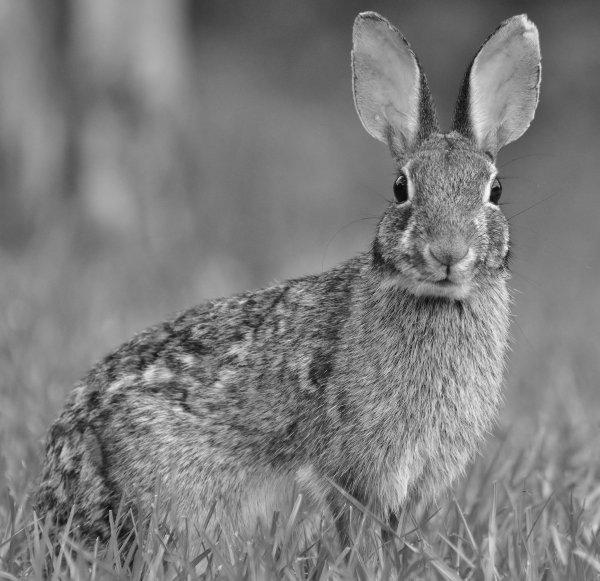

In [94]:
from albumentations.augmentations.transforms import LongestMaxSize
from sklearn.preprocessing import OneHotEncoder
import albumentations as A


def get_x_y_preprocessors(y: RawY):
  logger.info(y.shape)
  
  encoder = OneHotEncoder(sparse=False).fit(y)
  transform = A.Compose([A.ToGray(p=1.0), LongestMaxSize(600)])

  return transform, encoder

x,y = get_x_y(get_data())
x_encoder, y_encoder = get_x_y_preprocessors(y)
data = {"image": x[0]}
transformed_data = x_encoder(**data)["image"]
logger.info(transformed_data.shape)
logger.info(x[0][0,0,:])
logger.info(transformed_data[0, 0, :])
cv2_imshow(transformed_data)


# def get_processed_x_y(X: RawX, Y: RawY):

#   x_encoder,y_encoder = get_x_y_preprocessors(X, Y)

#   x_augmented = []
#   for x_sample in x:
#     x_data = {"image": }


#   encodedx_encoder(x_data[0])

#   encoder = OneHotEncoder(sparse=False)
#   y_transformed: np.ndarray = encoder.fit_transform(y)

#   #



  # pass
  

# Data Processing

In [ ]:
import tensorflow as tf
